In [ ]:
# new method + preprocess continue

In [1]:
# read the preprocessed data
import pandas as pd
origdf = pd.read_csv('preprocessed_nodummy.csv')

In [2]:
subm = pd.read_csv('data_submission_example.csv')

In [3]:
df = origdf.copy()

In [4]:
df.columns

Index(['CONTRACT_ID', 'BORROWER_ID', 'CONTRACT_BANK_ID',
       'CONTRACT_CREDIT_INTERMEDIARY', 'CONTRACT_CREDIT_LOSS',
       'CONTRACT_CURRENCY', 'CONTRACT_DATE_OF_LOAN_AGREEMENT',
       'CONTRACT_DEPT_SERVICE_TO_INCOME', 'CONTRACT_FREQUENCY_TYPE',
       'CONTRACT_INCOME', 'CONTRACT_INSTALMENT_AMOUNT',
       'CONTRACT_INSTALMENT_AMOUNT_2', 'CONTRACT_INTEREST_PERIOD',
       'CONTRACT_INTEREST_RATE', 'CONTRACT_LGD', 'CONTRACT_LOAN_AMOUNT',
       'CONTRACT_LOAN_CONTRACT_TYPE', 'CONTRACT_LOAN_TO_VALUE_RATIO',
       'CONTRACT_LOAN_TYPE', 'CONTRACT_MARKET_VALUE', 'CONTRACT_MATURITY_DATE',
       'CONTRACT_MORTGAGE_LENDING_VALUE', 'CONTRACT_MORTGAGE_TYPE',
       'CONTRACT_REFINANCED', 'CONTRACT_RISK_WEIGHTED_ASSETS',
       'CONTRACT_TYPE_OF_INTEREST_REPAYMENT', 'BORROWER_BIRTH_YEAR',
       'BORROWER_CITIZENSHIP', 'BORROWER_COUNTRY', 'BORROWER_COUNTY',
       'BORROWER_TYPE_OF_CUSTOMER', 'BORROWER_TYPE_OF_SETTLEMENT',
       'TARGET_EVENT', 'TARGET_EVENT_DAY'],
      dtype='object')

At first, let's build functions that will handle outliers for the columns.

In [22]:
def handle_outliers(df, col_name, threshold_max, threshold_min = 0, value_to_be_replaced = np.nan):
    '''
    This function handles outliers for a column of the dataframe. 
    Any value that is greater than threshold_max or less than threshold_min is considered as an outlier.
    All such outliers will be replaced with value_to_be_replaced
    INPUT:
    df - Dataframe for which outliers need to be handled
    col_name - column name for which outliers need to be handled
    threshold_max - Any value greater than this will be considered as an outlier
    threshold_min - Any value less than this will be considered as an outlier
    value_to_be_replaced - all outliers will be replaced by this value
    OUTPUT:
    df - dataframe after outliers are handled
    '''
    # any value above or below the threshold will be considered as outlier
    is_outlier = (df[col_name] > threshold_max) | (df[col_name] < threshold_min)
    df_anomalous = df[is_outlier]
    num_of_outlier_rows = len(df_anomalous.index)
    
    if num_of_outlier_rows > 0:
        # print all those unique outlier values
        outliers = df_anomalous[col_name].unique()
        print("List of unique outlier values in '{}' column, as found: {}".format(col_name, str(outliers)))
        
        # replace all outliers
        df.loc[is_outlier, col_name] = value_to_be_replaced
        print('Number of rows updated: ', str(num_of_outlier_rows))
    else:
        print("No outlier found for column '{}'.".format(col_name))
    
    del df_anomalous
    gc.collect()
    
    return df

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
 
def plot_missing_data(df):
    '''
    This function accepts a dataframe.
    For this dataframe, the function
    1. computes percentage of missing value for each column, and,
    2. plots the data in a graph.
    INPUT:
    df - dataframe on which missing data % needs to be computed and plotted
    OUTPUT: Plot on missing data
    '''
    fig = plt.figure(figsize=(18,6))
    
    # percentage of missing data in the dataframe
    missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
    
    ax = sns.pointplot(x="index", y=0, data=missing)
    plt.xticks(rotation=90, fontsize=7)
    plt.title('Percentage of missing values in the data')
    plt.ylabel('PERCENTAGE')
    plt.xlabel('COLUMNS')
    ax.set_facecolor('k')
    fig.set_facecolor('lightgrey')

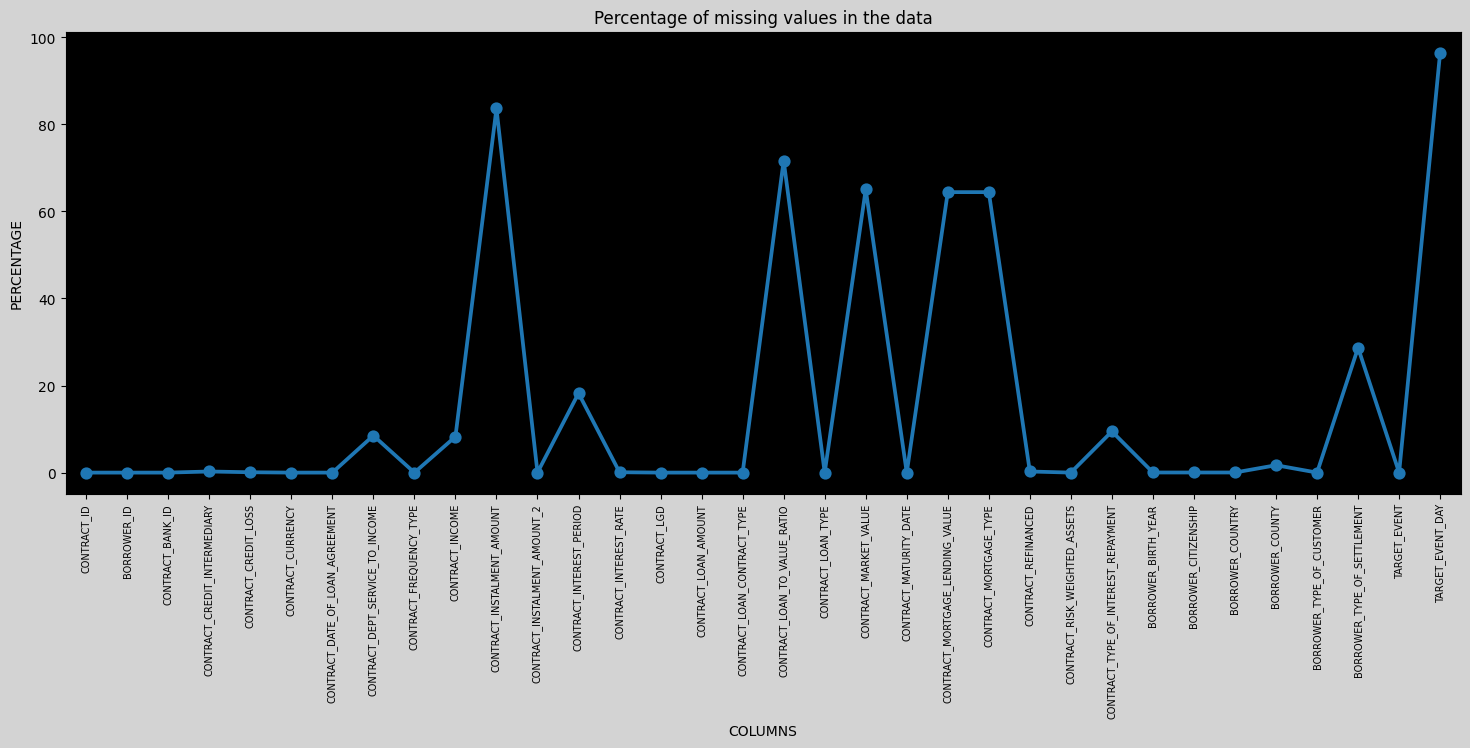

In [20]:
plot_missing_data(df)

Categorical datas

In [21]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

CONTRACT_ID                  1183701
BORROWER_ID                  1109101
CONTRACT_BANK_ID                 132
CONTRACT_FREQUENCY_TYPE            8
CONTRACT_LOAN_TYPE                18
BORROWER_TYPE_OF_CUSTOMER          2
TARGET_EVENT                       3
dtype: int64

PCA

In [24]:
# df without the string values

nostring_df = df.select_dtypes(exclude=['object'])

In [25]:
nostring_df.columns

Index(['CONTRACT_CREDIT_INTERMEDIARY', 'CONTRACT_CREDIT_LOSS',
       'CONTRACT_CURRENCY', 'CONTRACT_DATE_OF_LOAN_AGREEMENT',
       'CONTRACT_DEPT_SERVICE_TO_INCOME', 'CONTRACT_INCOME',
       'CONTRACT_INSTALMENT_AMOUNT', 'CONTRACT_INSTALMENT_AMOUNT_2',
       'CONTRACT_INTEREST_PERIOD', 'CONTRACT_INTEREST_RATE', 'CONTRACT_LGD',
       'CONTRACT_LOAN_AMOUNT', 'CONTRACT_LOAN_CONTRACT_TYPE',
       'CONTRACT_LOAN_TO_VALUE_RATIO', 'CONTRACT_MARKET_VALUE',
       'CONTRACT_MATURITY_DATE', 'CONTRACT_MORTGAGE_LENDING_VALUE',
       'CONTRACT_MORTGAGE_TYPE', 'CONTRACT_REFINANCED',
       'CONTRACT_RISK_WEIGHTED_ASSETS', 'CONTRACT_TYPE_OF_INTEREST_REPAYMENT',
       'BORROWER_BIRTH_YEAR', 'BORROWER_CITIZENSHIP', 'BORROWER_COUNTRY',
       'BORROWER_COUNTY', 'BORROWER_TYPE_OF_SETTLEMENT', 'TARGET_EVENT_DAY'],
      dtype='object')

In [27]:
# all columns that contains Nan values, replace with 0



nan_cols = nostring_df.columns[nostring_df.isna().any()].tolist()

In [28]:
nan_cols

['CONTRACT_CREDIT_INTERMEDIARY',
 'CONTRACT_CREDIT_LOSS',
 'CONTRACT_DEPT_SERVICE_TO_INCOME',
 'CONTRACT_INCOME',
 'CONTRACT_INSTALMENT_AMOUNT',
 'CONTRACT_INSTALMENT_AMOUNT_2',
 'CONTRACT_INTEREST_PERIOD',
 'CONTRACT_INTEREST_RATE',
 'CONTRACT_LGD',
 'CONTRACT_LOAN_TO_VALUE_RATIO',
 'CONTRACT_MARKET_VALUE',
 'CONTRACT_MORTGAGE_LENDING_VALUE',
 'CONTRACT_MORTGAGE_TYPE',
 'CONTRACT_REFINANCED',
 'CONTRACT_RISK_WEIGHTED_ASSETS',
 'CONTRACT_TYPE_OF_INTEREST_REPAYMENT',
 'BORROWER_BIRTH_YEAR',
 'BORROWER_CITIZENSHIP',
 'BORROWER_COUNTRY',
 'BORROWER_COUNTY',
 'BORROWER_TYPE_OF_SETTLEMENT',
 'TARGET_EVENT_DAY']

In [26]:

from sklearn.decomposition import PCA
# Apply PCA to the data.
pca = PCA()
pca.fit(nostring_df)

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [6]:
def mode_func(column):
    return column.mode().iloc[0] 

def datagen_modeA(origdf, startnap, endnap):
    df2 = origdf[origdf['CONTRACT_DATE_OF_LOAN_AGREEMENT']>=startnap].copy()
    df = df2[df2['CONTRACT_DATE_OF_LOAN_AGREEMENT']<endnap].copy()
    cust_df = pd.DataFrame({'BORROWER_ID':df['BORROWER_ID'].unique()})
    
    
    # TARGET VALTOZO 
    # a következő évben bekövetkező eseményeket nézzük
    # k: késedelmes lesz
    feltetel = (df['TARGET_EVENT_DAY']>endnap) & (df['TARGET_EVENT_DAY']<endnap+2*365) & (df['TARGET_EVENT'] == 'K')
    #feltetel_2 = (df['TARGET_EVENT_DAY']<endnap) & (df['TARGET_EVENT_DAY']<startnap) & (df['TARGET_EVENT'] == 'K') #egy éven belül elbukott
    df['target'] = 0
    df.loc[feltetel,'target']=1
    #df.loc[feltetel_2,'target']=2
    
    # drop rows where target is 2
    #df = df[df['target']!=2]
    
    stat = df.groupby('BORROWER_ID',as_index=False).agg({'target':'max'})
    # akik nem fizettek az 1 lesz
    cust_df = cust_df.merge(stat,on='BORROWER_ID',how='left')
    # mindenki más aki előtörlesztett vagy semmi nem történt az 0
    cust_df['target'] = cust_df['target'].fillna(0)
    
    
    # BEMENO VALTOZOK
    # törlesztőösszeg ÉS RISK
    stat = df.groupby("BORROWER_ID", as_index=False).agg({'CONTRACT_ID':'count',
                                                          'CONTRACT_LOAN_AMOUNT':'sum',
                                                          'CONTRACT_INSTALMENT_AMOUNT':'sum',
                                                          'CONTRACT_INSTALMENT_AMOUNT_2':'sum',
                                                          'CONTRACT_RISK_WEIGHTED_ASSETS':'sum',
                                                          'CONTRACT_INTEREST_RATE': 'mean',
                                                          'CONTRACT_CREDIT_LOSS':'sum',
                                                          'CONTRACT_CURRENCY':mode_func,
                                                          'CONTRACT_DEPT_SERVICE_TO_INCOME':'mean',
                                                          ###'CONTRACT_FREQUENCY_TYPE':'median',
                                                          'CONTRACT_INCOME':'sum',
                                                          'CONTRACT_INTEREST_PERIOD':'mean',
                                                          'CONTRACT_INTEREST_RATE':'max',
                                                          'CONTRACT_LGD':'max',
                                                          ###lehet##'CONTRACT_LOAN_CONTRACT_TYPE':mode_func,
                                                          'CONTRACT_LOAN_TO_VALUE_RATIO':'max',
                                                          'CONTRACT_LOAN_TYPE':mode_func,
                                                          'CONTRACT_MORTGAGE_LENDING_VALUE':'sum',
                                                          ##'CONTRACT_MORTGAGE_TYPE':mode_func,
                                                          ###'CONTRACT_REFINANCED':'median',
                                                          ##'CONTRACT_TYPE_OF_INTEREST_REPAYMENT':mode_func,
                                                          ####lehet##'BORROWER_TYPE_OF_CUSTOMER':mode_func,
                                                          ##'BORROWER_TYPE_OF_SETTLEMENT':mode_func,
                                                          ##'BORROWER_COUNTY':mode_func,
                                                          ##'BORROWER_COUNTRY':mode_func,
                                                          ##'BORROWER_CITIZENSHIP':mode_func,  
                                                          'CONTRACT_MARKET_VALUE':'sum',                                                        
                                                          })
    print(stat.columns)
    cust_df = cust_df.merge(stat,on='BORROWER_ID',how='left')
    # stat.columns=['BORROWER_ID','in_contract_num','in_loan_amount_sum','contract_instalment','contract_instalment_2',
    #               'contract_risk_weighted_assets','contract_interest_rate',
    #               'contract_credit_loss','contract_currency','contract_dept_service_to_income',
    #               'contract_income','contract_interest_period','contract_interest_rate','contract_lgd',
    #               'contract_loan_contract_type','contract_loan_to_value_ratio','contract_loan_type',
    #               'contract_mortgage_lending_value',
    #               'borrower_type_of_customer','contract_market_value']
    
   
    # stat = df.groupby(["BORROWER_ID"])
    
    # stat = stat['CONTRACT_CREDIT_INTERMEDIARY'].agg(pd.Series.mode)
    # stat = stat['BORROWER_TYPE_OF_SETTLEMENT'].agg(pd.Series.mode)
    # stat = stat['BORROWER_COUNTY'].agg(pd.Series.mode)
    # stat = stat['CONTRACT_TYPE_OF_INTEREST_REPAYMENT'].agg(pd.Series.mode)
    # stat = stat['BORROWER_COUNTRY'].agg(pd.Series.mode)
    # stat = stat['BORROWER_CITIZENSHIP'].agg(pd.Series.mode)
    
    # stat.columns=['BORROWER_ID','contract_credit_intermediary','borrower_type_of_settlement',
    #               'borrower_county','borrower_type_of_interest_repayment','borrower_country',
    #               'borrower_citizenship']
    # cust_df = cust_df.merge(stat,on='BORROWER_ID',how='left')
    
   
    
    return cust_df
    
    #cust_df = pd.DataFrame({'BORROWER_ID':df['BORROWER_ID'].unique()})
    
    #target_df = origdf[origdf['CONTRACT_DATE_OF_LOAN_AGREEMENT']>=endnap]
    #target_df = target_df[target_df['CONTRACT_DATE_OF_LOAN_AGREEMENT']<endnap+2*365]
    #target_df['target_int'] = target_df['TARGET_EVENT'].map({'-':0,'E':0,'K':1})
    #stat = target_df.groupby('BORROWER_ID',as_index=False).agg({'target_int':'max'})
    #cust_df = cust_df.merge(stat,on='BORROWER_ID',how='left')
    
    #return cust_df

R1 = datagen_modeA(df,0,365)
R2 = datagen_modeA(df,365*2,365*3)

Index(['BORROWER_ID', 'CONTRACT_ID', 'CONTRACT_LOAN_AMOUNT',
       'CONTRACT_INSTALMENT_AMOUNT', 'CONTRACT_INSTALMENT_AMOUNT_2',
       'CONTRACT_RISK_WEIGHTED_ASSETS', 'CONTRACT_INTEREST_RATE',
       'CONTRACT_CREDIT_LOSS', 'CONTRACT_CURRENCY',
       'CONTRACT_DEPT_SERVICE_TO_INCOME', 'CONTRACT_INCOME',
       'CONTRACT_INTEREST_PERIOD', 'CONTRACT_LGD',
       'CONTRACT_LOAN_TO_VALUE_RATIO', 'CONTRACT_LOAN_TYPE',
       'CONTRACT_MORTGAGE_LENDING_VALUE', 'CONTRACT_MARKET_VALUE'],
      dtype='object')
Index(['BORROWER_ID', 'CONTRACT_ID', 'CONTRACT_LOAN_AMOUNT',
       'CONTRACT_INSTALMENT_AMOUNT', 'CONTRACT_INSTALMENT_AMOUNT_2',
       'CONTRACT_RISK_WEIGHTED_ASSETS', 'CONTRACT_INTEREST_RATE',
       'CONTRACT_CREDIT_LOSS', 'CONTRACT_CURRENCY',
       'CONTRACT_DEPT_SERVICE_TO_INCOME', 'CONTRACT_INCOME',
       'CONTRACT_INTEREST_PERIOD', 'CONTRACT_LGD',
       'CONTRACT_LOAN_TO_VALUE_RATIO', 'CONTRACT_LOAN_TYPE',
       'CONTRACT_MORTGAGE_LENDING_VALUE', 'CONTRACT_MARKET_VALUE'],


In [7]:
# SHOW COLUMNS WHERE IS NULL
R1.columns[R1.isnull().any()].tolist()
# WHERE CONTRACT LGD IS NULL SWITCH 0
R1['CONTRACT_LGD'] = R1['CONTRACT_LGD'].fillna(0)
R1['CONTRACT_INTEREST_RATE'] = R1['CONTRACT_INTEREST_RATE'].fillna(0)
R1['CONTRACT_INTEREST_PERIOD'] = R1['CONTRACT_INTEREST_PERIOD'].fillna(0)
R1['CONTRACT_DEPT_SERVICE_TO_INCOME'] = R1['CONTRACT_DEPT_SERVICE_TO_INCOME'].fillna(0)
R1['CONTRACT_RISK_WEIGHTED_ASSETS'] = R1['CONTRACT_RISK_WEIGHTED_ASSETS'].fillna(0)
R1['CONTRACT_LOAN_TO_VALUE_RATIO'] = R1['CONTRACT_LOAN_TO_VALUE_RATIO'].fillna(0)

# SAME TO R2
R2.columns[R2.isnull().any()].tolist()
R2['CONTRACT_LGD'] = R2['CONTRACT_LGD'].fillna(0)
R2['CONTRACT_INTEREST_RATE'] = R2['CONTRACT_INTEREST_RATE'].fillna(0)
R2['CONTRACT_INTEREST_PERIOD'] = R2['CONTRACT_INTEREST_PERIOD'].fillna(0)
R2['CONTRACT_DEPT_SERVICE_TO_INCOME'] = R2['CONTRACT_DEPT_SERVICE_TO_INCOME'].fillna(0)
R2['CONTRACT_RISK_WEIGHTED_ASSETS'] = R2['CONTRACT_RISK_WEIGHTED_ASSETS'].fillna(0)
R2['CONTRACT_LOAN_TO_VALUE_RATIO'] = R2['CONTRACT_LOAN_TO_VALUE_RATIO'].fillna(0)





In [81]:
R1

,BORROWER_ID,target,CONTRACT_ID,CONTRACT_LOAN_AMOUNT,CONTRACT_INSTALMENT_AMOUNT,CONTRACT_INSTALMENT_AMOUNT_2,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_INTEREST_RATE,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_INCOME,CONTRACT_INTEREST_PERIOD,CONTRACT_LGD,CONTRACT_LOAN_TO_VALUE_RATIO,CONTRACT_LOAN_TYPE,CONTRACT_MORTGAGE_LENDING_VALUE,CONTRACT_MARKET_VALUE,fold
0,d8SqtuEV,0,2,396086,9545.0,25538.0,1.03,22.08,0.0,31,34.54,129364.0,NaN,183967.0,NaN,69f70539,0.0,0.0,0
1,gII7nnq4,0,1,275924,8899.0,8880.0,74.77,22.35,16350.0,31,7.05,127305.0,50.0,282553.0,NaN,b503a0de,0.0,0.0,1
2,M417onFP,0,1,169624,4003.0,3901.0,74.30,23.92,2395.0,31,NaN,0.0,37.0,163319.0,NaN,69f70539,0.0,0.0,0
3,L2Nu2zZe,0,1,140975,11405.0,11423.0,1.03,16.28,0.0,31,NaN,0.0,NaN,118161.0,NaN,b503a0de,0.0,0.0,1
4,lqPGd2+x,0,1,190782,10431.0,10420.0,1.00,21.66,0.0,31,NaN,0.0,NaN,170739.0,NaN,69f70539,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386382,obiRToLy,0,1,59794,0.0,0.0,1.00,22.99,0.0,31,3.60,81477.0,NaN,60545.0,NaN,d3aaffde,0.0,0.0,0
386383,M7dKpkEx,0,1,112694,0.0,10510.0,0.97,34.71,0.0,31,42.31,126761.0,NaN,115710.0,NaN,b503a0de,0.0,0.0,1
386384,5IwSjcnC,0,1,996664,21284.0,75872.0,75.88,12.47,8068.0,31,39.36,177504.0,6.0,1495241.0,NaN,b503a0de,0.0,0.0,0
386385,FWvYyvQ0,0,1,996664,21284.0,75872.0,75.88,12.47,8068.0,31,39.36,177504.0,6.0,1495241.0,NaN,b503a0de,0.0,0.0,1


In [8]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier

In [9]:
from sklearn.metrics import log_loss

bemeno_valtozok = ['CONTRACT_ID', 'CONTRACT_LOAN_AMOUNT',
       'CONTRACT_INSTALMENT_AMOUNT', 'CONTRACT_INSTALMENT_AMOUNT_2',
       'CONTRACT_RISK_WEIGHTED_ASSETS', 'CONTRACT_INTEREST_RATE',
       'CONTRACT_CREDIT_LOSS', 'CONTRACT_CURRENCY',
       'CONTRACT_DEPT_SERVICE_TO_INCOME', 'CONTRACT_INCOME',
       'CONTRACT_INTEREST_PERIOD', 'CONTRACT_LGD',
       'CONTRACT_LOAN_TO_VALUE_RATIO', 
       'CONTRACT_MORTGAGE_LENDING_VALUE', 'CONTRACT_MARKET_VALUE']
R1 = R1.reset_index(drop=True)
cv=2
R1['fold'] = R1.index % cv
loglosslist = []
for i in range(cv):
    train_df = R1[R1['fold']!=i]
    test_df = R1[R1['fold']==i]
    gbm = GradientBoostingClassifier(n_estimators=100,max_depth=4,random_state=42)
    gbm.fit(train_df[bemeno_valtozok],train_df['target'])
    test_df['p'] = gbm.predict_proba(test_df[bemeno_valtozok])[:,1]
    logloss = log_loss(test_df['target'],test_df['p'])
    print(i,logloss)
    loglosslist.append(logloss)

C:\Users\Máté\AppData\Local\Temp\ipykernel_15396\1404679090.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['p'] = gbm.predict_proba(test_df[bemeno_valtozok])[:,1]


0 0.022220666756722345
1 0.022449259728288765


C:\Users\Máté\AppData\Local\Temp\ipykernel_15396\1404679090.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['p'] = gbm.predict_proba(test_df[bemeno_valtozok])[:,1]


In [10]:
gbm.fit(R1[bemeno_valtozok],R1['target'])

GradientBoostingClassifier(max_depth=4, random_state=42)

In [11]:
R2['p'] = gbm.predict_proba(R2[bemeno_valtozok])[:,1]

In [12]:
R2['p'].mean()

0.008043506730965821

In [13]:
R2['p2'] = 1-R2['p']
R2['p2'] = R2['p2']*(1-0.0148)/(R2['p2'].mean())
R2['p3'] = 1-R2['p2']

régi

In [14]:
subm2 = subm.merge(R2[['BORROWER_ID','p3']],on = 'BORROWER_ID',how='left')
subm2.loc[ ~subm2['p3'].isna(),'PRED']=subm2.loc[ ~subm2['p3'].isna(),'p3']
del subm2['p3']

In [ ]:
subm2

In [15]:
# RESULT
R2['p3'].mean()

0.014800000000000094

In [98]:
subm2.to_csv("target_002.csv",index=None)

In [99]:
R1.columns

Index(['BORROWER_ID', 'target', 'CONTRACT_ID', 'CONTRACT_LOAN_AMOUNT',
       'CONTRACT_INSTALMENT_AMOUNT', 'CONTRACT_INSTALMENT_AMOUNT_2',
       'CONTRACT_RISK_WEIGHTED_ASSETS', 'CONTRACT_INTEREST_RATE',
       'CONTRACT_CREDIT_LOSS', 'CONTRACT_CURRENCY',
       'CONTRACT_DEPT_SERVICE_TO_INCOME', 'CONTRACT_INCOME',
       'CONTRACT_INTEREST_PERIOD', 'CONTRACT_LGD',
       'CONTRACT_LOAN_TO_VALUE_RATIO', 'CONTRACT_LOAN_TYPE',
       'CONTRACT_MORTGAGE_LENDING_VALUE', 'CONTRACT_MARKET_VALUE', 'fold'],
      dtype='object')

In [113]:
# ne használt label encodingot, helyette one-hot encodingot vagy target encodingot 
dummy_cols_list = ['CONTRACT_LOAN_TYPE']
dummy_names = []

for col in dummy_cols_list:
    dummy_df = pd.get_dummies(R1.loc[:, col], prefix=col, drop_first=True)
    dummy_df = dummy_df.astype(int)
    dummy_names += dummy_df.columns.tolist()
    R1 = pd.concat([R1, dummy_df], axis=1)

,BORROWER_ID,target,CONTRACT_ID,CONTRACT_LOAN_AMOUNT,CONTRACT_INSTALMENT_AMOUNT,CONTRACT_INSTALMENT_AMOUNT_2,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_INTEREST_RATE,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,...,CONTRACT_INCOME,CONTRACT_INTEREST_PERIOD,CONTRACT_LGD,CONTRACT_LOAN_TO_VALUE_RATIO,CONTRACT_LOAN_TYPE,CONTRACT_MORTGAGE_LENDING_VALUE,CONTRACT_MARKET_VALUE,p,p2,p3
153,jq8oDcyI,0,1,486289,0.0,1266144.0,1.03,20.15,158343.0,31,...,164342.0,0.0,469038.0,0.0,5a06241e,0.0,0.0,0.639908,0.357614,0.642386
479,qW3B+pgb,0,20,4687294,0.0,3270055.0,160.32,35.73,2317145.0,31,...,3658889.0,9.8,1487455.0,0.0,5a06241e,0.0,0.0,0.904552,0.094791,0.905209
511,3DmqCeN2,0,2,3996222,0.0,85370.0,89.84,21.62,2069471.0,31,...,476086.0,0.0,3605513.0,0.0,5a06241e,0.0,0.0,0.597543,0.399688,0.600312
553,sXzDF9gb,0,10,2598149,0.0,465210.0,150.80,40.23,956685.0,31,...,2803749.0,4.9,419896.0,0.0,5a06241e,0.0,0.0,0.777278,0.221190,0.778810
602,XCO6/sOW,0,2,761372,0.0,681681.0,148.30,21.69,651832.0,31,...,185732.0,30.5,1379697.0,0.0,83910425,0.0,0.0,0.803795,0.194855,0.805145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483924,ww9ChVFU,0,1,246525,0.0,8480.0,147.45,9.93,177327.0,31,...,86405.0,0.0,291710.0,0.0,5a06241e,3258229.0,4580566.0,0.587108,0.410051,0.589949
484216,5JtUZizH,0,1,3913548,0.0,3579737.0,100.63,15.94,3460520.0,31,...,259388.0,84.0,4013960.0,0.0,5a06241e,0.0,0.0,0.638799,0.358715,0.641285
484222,AljP2Rkf,0,1,787154,0.0,1000788.0,247.07,18.50,661964.0,31,...,132797.0,85.0,808073.0,0.0,83910425,0.0,0.0,0.562122,0.434865,0.565135
484302,u3nUi6sr,0,1,498995,0.0,897224.0,1.03,19.28,123010.0,31,...,168796.0,0.0,512726.0,0.0,5a06241e,0.0,0.0,0.699228,0.298703,0.701297


In [114]:
R1.columns

Index(['BORROWER_ID', 'target', 'CONTRACT_ID', 'CONTRACT_LOAN_AMOUNT',
       'CONTRACT_INSTALMENT_AMOUNT', 'CONTRACT_INSTALMENT_AMOUNT_2',
       'CONTRACT_RISK_WEIGHTED_ASSETS', 'CONTRACT_INTEREST_RATE',
       'CONTRACT_CREDIT_LOSS', 'CONTRACT_CURRENCY',
       'CONTRACT_DEPT_SERVICE_TO_INCOME', 'CONTRACT_INCOME',
       'CONTRACT_INTEREST_PERIOD', 'CONTRACT_LGD',
       'CONTRACT_LOAN_TO_VALUE_RATIO', 'CONTRACT_LOAN_TYPE',
       'CONTRACT_MORTGAGE_LENDING_VALUE', 'CONTRACT_MARKET_VALUE', 'fold',
       'CONTRACT_LOAN_TYPE_1f951336', 'CONTRACT_LOAN_TYPE_2f88e16c',
       'CONTRACT_LOAN_TYPE_47693941', 'CONTRACT_LOAN_TYPE_5a06241e',
       'CONTRACT_LOAN_TYPE_694cbaee', 'CONTRACT_LOAN_TYPE_69f70539',
       'CONTRACT_LOAN_TYPE_7e2065f4', 'CONTRACT_LOAN_TYPE_83910425',
       'CONTRACT_LOAN_TYPE_8fe006f1', 'CONTRACT_LOAN_TYPE_955ae3ef',
       'CONTRACT_LOAN_TYPE_95c4f8fb', 'CONTRACT_LOAN_TYPE_b503a0de',
       'CONTRACT_LOAN_TYPE_cde77491', 'CONTRACT_LOAN_TYPE_cf07c2dd',
       'CON

In [127]:
cols = ['CONTRACT_ID', 'CONTRACT_LOAN_AMOUNT',
       'CONTRACT_INSTALMENT_AMOUNT', 'CONTRACT_INSTALMENT_AMOUNT_2',
       'CONTRACT_RISK_WEIGHTED_ASSETS', 'CONTRACT_INTEREST_RATE',
       'CONTRACT_CREDIT_LOSS', 'CONTRACT_CURRENCY',
       'CONTRACT_DEPT_SERVICE_TO_INCOME', 'CONTRACT_INCOME',
       'CONTRACT_INTEREST_PERIOD', 'CONTRACT_LGD',
       'CONTRACT_LOAN_TO_VALUE_RATIO', 
       'CONTRACT_MORTGAGE_LENDING_VALUE', 'CONTRACT_MARKET_VALUE', 'fold',
       'CONTRACT_LOAN_TYPE_1f951336', 'CONTRACT_LOAN_TYPE_2f88e16c',
       'CONTRACT_LOAN_TYPE_47693941', 'CONTRACT_LOAN_TYPE_5a06241e',
       'CONTRACT_LOAN_TYPE_694cbaee', 'CONTRACT_LOAN_TYPE_69f70539',
       'CONTRACT_LOAN_TYPE_7e2065f4', 'CONTRACT_LOAN_TYPE_83910425',
       'CONTRACT_LOAN_TYPE_8fe006f1', 'CONTRACT_LOAN_TYPE_955ae3ef',
       'CONTRACT_LOAN_TYPE_95c4f8fb', 'CONTRACT_LOAN_TYPE_b503a0de',
       'CONTRACT_LOAN_TYPE_cde77491', 'CONTRACT_LOAN_TYPE_cf07c2dd',
       'CONTRACT_LOAN_TYPE_d3aaffde', 'CONTRACT_LOAN_TYPE_eab72d7a',
       'CONTRACT_LOAN_TYPE_f792971b']


In [128]:
from sklearn.model_selection import train_test_split

# Assuming your features are stored in X and the target variable (loan default) is in y
# X should be a DataFrame or NumPy array, and y should be a Series or NumPy array
X = R1[cols].astype(float)
y = R1['target'].astype(float)
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, you can further split the training set into a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [121]:
import torch

X_train = torch.tensor(X_train, dtype=torch.int32)
X_test = torch.tensor(X_test, dtype=torch.int32)
y_train = torch.tensor(y_train, dtype=torch.int32)
y_test = torch.tensor(y_test, dtype=torch.int32)
X_val = torch.tensor(X_val, dtype=torch.int32)
y_val = torch.tensor(y_val, dtype=torch.int32)


TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [133]:
X_train

,CONTRACT_ID,CONTRACT_LOAN_AMOUNT,CONTRACT_INSTALMENT_AMOUNT,CONTRACT_INSTALMENT_AMOUNT_2,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_INTEREST_RATE,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_INCOME,...,CONTRACT_LOAN_TYPE_83910425,CONTRACT_LOAN_TYPE_8fe006f1,CONTRACT_LOAN_TYPE_955ae3ef,CONTRACT_LOAN_TYPE_95c4f8fb,CONTRACT_LOAN_TYPE_b503a0de,CONTRACT_LOAN_TYPE_cde77491,CONTRACT_LOAN_TYPE_cf07c2dd,CONTRACT_LOAN_TYPE_d3aaffde,CONTRACT_LOAN_TYPE_eab72d7a,CONTRACT_LOAN_TYPE_f792971b
352076,1.0,2257166.0,55023.0,54764.0,39.77,17.14,0.0,31.0,47.430000,386548.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
200874,1.0,86347.0,8713.0,8690.0,79.11,30.04,0.0,31.0,3.960000,221048.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
286656,1.0,3490543.0,27840.0,30146.0,44.67,8.23,45191.0,31.0,19.850000,143940.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301291,3.0,33338115.0,232203.0,231082.0,37.15,3.96,50248.0,31.0,13.853333,5508824.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
230562,1.0,348376.0,0.0,30880.0,0.00,0.00,0.0,31.0,13.320000,132411.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34608,1.0,613591.0,51849.0,53425.0,0.98,22.64,0.0,31.0,32.560000,367471.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151062,1.0,4481218.0,0.0,22892.0,75.17,6.15,17773.0,31.0,39.520000,309258.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
237573,1.0,117787.0,6064.0,6090.0,1.02,18.30,0.0,31.0,5.870000,103465.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
282274,1.0,1693429.0,24539.0,15747.0,75.33,10.48,1309.0,31.0,12.160000,217084.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
len(cols)

17

In [130]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=33))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['loss','accuracy'])

In [131]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10


TypeError: in user code:

    File "f:\Egyetem\python_mate_laptop\lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "f:\Egyetem\python_mate_laptop\lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "f:\Egyetem\python_mate_laptop\lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "f:\Egyetem\python_mate_laptop\lib\site-packages\keras\src\engine\training.py", line 1131, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "f:\Egyetem\python_mate_laptop\lib\site-packages\keras\src\engine\training.py", line 1225, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "f:\Egyetem\python_mate_laptop\lib\site-packages\keras\src\engine\compile_utils.py", line 620, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "f:\Egyetem\python_mate_laptop\lib\site-packages\keras\src\utils\metrics_utils.py", line 77, in decorated
        result = update_state_fn(*args, **kwargs)
    File "f:\Egyetem\python_mate_laptop\lib\site-packages\keras\src\metrics\base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "f:\Egyetem\python_mate_laptop\lib\site-packages\keras\src\metrics\base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)

    TypeError: 'str' object is not callable


In [ ]:
from sklearn.metrics import log_loss, roc_auc_score

# Predict probabilities for the test set
y_pred_proba = model.predict(X_test)

# Calculate log loss and ROC AUC
logloss = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Log Loss: {logloss}')
print(f'ROC AUC: {roc_auc}')

In [23]:
data = {'Category': ['A', 'B', 'A', 'B', 'A'],
        'Value1': [10, 20, 30, 40, 50],
        'Value2': [100, 200, 300, 400, 500],
        'Dummy1': [1, 0, 1, 1, 0],
        'Dummy2': [0, 1, 1, 0, 1]}

In [27]:
df = pd.DataFrame(data)

# List of columns to group by
group_columns = ['Category']

# List of aggregation functions and corresponding columns
aggregation = {
    'Value1': 'sum',
    'Value2': 'mean'
}

# Perform the aggregation
result_df = df.groupby(group_columns).agg(aggregation)

In [28]:
print(result_df)

          Value1  Value2
Category                
A             90   300.0
B             60   300.0
